# List of Exercises 2 - Item B) and Item D) 

*Student: Luigi Lucas de Carvalho Silva / luigi.lcsilva@gmail.com*

**Obs.: Item D) is in the very end of this long notebook.**

First of all, let us import some useful packages.

In [1]:
### My packages.
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os
import math
import scipy.constants as constants
import scipy.integrate as integrate
import scipy.special as special
import scipy.optimize as optimize
import sympy as sp

### NumCosmo lines.
try:
  import gi
  gi.require_version('NumCosmo', '1.0')
  gi.require_version('NumCosmoMath', '1.0')
except:
  pass
from gi.repository import NumCosmo as Nc
from gi.repository import NumCosmoMath as Ncm

#
#  Initializing the library objects, this must be called before 
#  any other library function.
#
Ncm.cfg_init ()

Now, let us get the data from the "nc_data_snia_diag_legacy.obj" file.

In [2]:
means_obs = [34.117469999999997, 34.082340000000002, 34.070259999999998, 34.404829999999997, 34.128639999999997, 34.451230000000002, 34.318800000000003, 34.215560000000004, 34.161239999999999, 34.488590000000002, 34.575380000000003, 34.493369999999999, 34.940350000000002, 35.145130000000002, 35.249839999999999, 35.227229999999999, 34.93018, 35.191389999999998, 35.352319999999999, 35.34151, 35.56503, 35.14931, 35.994030000000002, 35.821800000000003, 35.558, 35.531300000000002, 35.78839, 35.836199999999998, 36.112879999999997, 36.28389, 36.275149999999996, 36.727640000000001, 36.382930000000002, 36.82694, 36.631860000000003, 36.793500000000002, 36.60604, 37.540019999999998, 37.603360000000002, 37.641710000000003, 37.464709999999997, 38.12106, 38.43656, 38.88447, 40.570869999999999, 40.682099999999998, 40.730200000000004, 40.998739999999998, 40.945410000000003, 41.25853, 41.322809999999997, 41.36636, 41.440710000000003, 41.473939999999999, 41.48489, 41.48789, 41.771929999999998, 41.775739999999999, 41.86542, 42.037439999999997, 42.030110000000001, 42.08907, 42.267910000000001, 42.17991, 42.428370000000001, 42.439010000000003, 42.643340000000002, 42.591529999999999, 42.824269999999999, 42.486130000000003, 42.461010000000002, 42.51052, 42.46461, 42.760820000000002, 42.880760000000002, 42.561369999999997, 42.514989999999997, 42.79513, 42.960189999999997, 43.02993, 42.745910000000002, 43.13241, 43.022689999999997, 43.397129999999997, 43.0456, 43.143700000000003, 43.022579999999998, 43.236460000000001, 43.17559, 43.208649999999999, 43.28689, 43.426960000000001, 43.169130000000003, 43.452640000000002, 43.353000000000002, 43.489539999999998, 43.691070000000003, 43.94979, 43.651919999999997, 43.531529999999997, 43.543680000000002, 44.41386, 43.474789999999999, 43.870280000000001, 44.094340000000003, 43.707729999999998, 44.258890000000001, 44.552239999999998, 44.429130000000001, 43.506959999999999, 43.953150000000001, 43.62209, 43.999270000000003, 43.940669999999997, 44.672240000000002]
z_obs = [0.015429999999999999, 0.015879999999999998, 0.016150000000000001, 0.016310000000000002, 0.016449999999999999, 0.01661, 0.016830000000000001, 0.01721, 0.017340000000000001, 0.017649999999999999, 0.01814, 0.01983, 0.021839999999999998, 0.023230000000000001, 0.02351, 0.024160000000000001, 0.024559999999999998, 0.024819999999999998, 0.025940000000000001, 0.02605, 0.02632, 0.027900000000000001, 0.029610000000000001, 0.030130000000000001, 0.03057, 0.030630000000000001, 0.031559999999999998, 0.034799999999999998, 0.036490000000000002, 0.039280000000000002, 0.042909999999999997, 0.04512, 0.048759999999999998, 0.050099999999999999, 0.050220000000000001, 0.052979999999999999, 0.053710000000000001, 0.06336, 0.070760000000000003, 0.074789999999999995, 0.078850000000000003, 0.087760000000000005, 0.10083, 0.12470000000000001, 0.24859999999999999, 0.26300000000000001, 0.28499999999999998, 0.29120000000000001, 0.33100000000000002, 0.33729999999999999, 0.3402, 0.34599999999999997, 0.35699999999999998, 0.35780000000000001, 0.36899999999999999, 0.37090000000000001, 0.41499999999999998, 0.42999999999999999, 0.44900000000000001, 0.45100000000000001, 0.4607, 0.4627, 0.46999999999999997, 0.496, 0.50429999999999997, 0.52100000000000002, 0.52600000000000002, 0.53200000000000003, 0.54800000000000004, 0.55000000000000004, 0.55159999999999998, 0.55700000000000005, 0.57099999999999995, 0.58099999999999996, 0.58169999999999999, 0.59199999999999997, 0.60399999999999998, 0.60999999999999999, 0.61299999999999999, 0.62, 0.62680000000000002, 0.63300000000000001, 0.64300000000000002, 0.67900000000000005, 0.68799999999999994, 0.69099999999999995, 0.69499999999999995, 0.70699999999999996, 0.70999999999999996, 0.72099999999999997, 0.72999999999999998, 0.74099999999999999, 0.752, 0.75600000000000001, 0.79100000000000004, 0.80000000000000004, 0.81000000000000005, 0.81100000000000005, 0.81699999999999995, 0.81799999999999995, 0.82179999999999997, 0.82999999999999996, 0.83999999999999997, 0.86799999999999999, 0.87, 0.90500000000000003, 0.91000000000000003, 0.92710000000000004, 0.93000000000000005, 0.94899999999999995, 0.94999999999999996, 0.95999999999999996, 0.96099999999999997, 0.98299999999999998, 1.01]
sigma_obs = [0.19292000000000001, 0.19033, 0.19617999999999999, 0.18698999999999999, 0.18648000000000001, 0.18865000000000001, 0.18634999999999999, 0.18315999999999999, 0.18215000000000001, 0.18018999999999999, 0.17867, 0.17172999999999999, 0.16571, 0.16145999999999999, 0.16600999999999999, 0.16137000000000001, 0.15934000000000001, 0.15994, 0.16148999999999999, 0.15581999999999999, 0.19253999999999999, 0.15323999999999999, 0.15362000000000001, 0.24753, 0.15085999999999999, 0.15947, 0.15057999999999999, 0.14807999999999999, 0.14657999999999999, 0.14294999999999999, 0.14374000000000001, 0.14305999999999999, 0.14054, 0.14433000000000001, 0.13855999999999999, 0.13921, 0.14169999999999999, 0.13900000000000001, 0.1394, 0.14005999999999999, 0.13743, 0.13893, 0.14224999999999999, 0.14007, 0.13249, 0.13172, 0.13195000000000001, 0.13503999999999999, 0.13167999999999999, 0.13138, 0.13161999999999999, 0.13266, 0.13228999999999999, 0.13173000000000001, 0.13203000000000001, 0.13446, 0.13369, 0.13657, 0.13833000000000001, 0.13447000000000001, 0.14319000000000001, 0.13549, 0.13478999999999999, 0.13639999999999999, 0.13677, 0.14183999999999999, 0.14221, 0.15515000000000001, 0.15376000000000001, 0.14235999999999999, 0.13555, 0.13421, 0.14868999999999999, 0.13919000000000001, 0.14176, 0.15886, 0.13417999999999999, 0.13671, 0.14465, 0.14410000000000001, 0.13569000000000001, 0.14562, 0.14354, 0.15769, 0.14005000000000001, 0.18895999999999999, 0.15690000000000001, 0.18373, 0.15179999999999999, 0.16864999999999999, 0.15110000000000001, 0.17566000000000001, 0.15923999999999999, 0.14326, 0.15151000000000001, 0.15898000000000001, 0.32857999999999998, 0.29466999999999999, 0.28556999999999999, 0.33106999999999998, 0.25391999999999998, 0.37047000000000002, 0.22628999999999999, 0.36829000000000001, 0.32807999999999998, 0.28938999999999998, 0.36984, 0.40148, 0.44995000000000002, 0.30181999999999998, 0.29831000000000002, 0.26844000000000001, 0.31807000000000002, 0.51326000000000005, 0.54895000000000005]

Now, let us define some functions.

In [3]:
c_km_s = constants.c/1000

#############################################################################
def norm_Hubble_func_inverse(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0):
    if (type(z)==float or type(z)==int or type(z)==np.float64):
        norm_Hubble_func_inverse = np.sqrt(1/(Omg_lamb_0 + Omg_k_0*(1+z)**2 + Omg_m_0*(1+z)**3 
                                                + Omg_r_0*(1+z)**4))
    else:
        norm_Hubble_func_inverse = [np.sqrt(1/(Omg_lamb_0 + Omg_k_0*(1+z)**2 + Omg_m_0*(1+z)**3 
                                                 + Omg_r_0*(1+z)**4)) for z in z]
    return norm_Hubble_func_inverse

#############################################################################
def comov_dist_NO_DIM(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0):
    if (type(z)==float or type(z)==int or type(z)==np.float64):
        comov_dist_NO_DIM_tup = integrate.quad(norm_Hubble_func_inverse, 0, z, 
                                               args=(Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0))
        comov_dist_NO_DIM = comov_dist_NO_DIM_tup[0]
    else:
        comov_dist_NO_DIM = [tup[0] for tup in [integrate.quad(norm_Hubble_func_inverse, 0, z, 
                                                                        args=(Omg_lamb_0, Omg_k_0, Omg_m_0, 
                                                                              Omg_r_0)) for z in z]]
    return comov_dist_NO_DIM

#############################################################################
def comov_temp_dist(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0):
    arr1 = comov_dist_NO_DIM(z,Omg_lamb_0,Omg_k_0,Omg_m_0,Omg_r_0)
    if (type(z)==float or type(z)==int or type(z)==np.float64): 
        if Omg_k_0==0:
            comov_temp_dist = arr1
        else:
            comov_temp_dist = np.sinh(np.sqrt(Omg_k_0)*arr1)/np.sqrt(Omg_k_0)
    else:
        if Omg_k_0==0:
            comov_temp_dist = [arr1[i] for i in range(0, len(z))]
        else:
            comov_temp_dist = [np.sinh(np.sqrt(Omg_k_0)*arr1[i])/np.sqrt(Omg_k_0) for i in range(0, len(z))] 
    return comov_temp_dist

#############################################################################
def comov_lum_dist(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0):
    arr1 = comov_temp_dist(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0)
    if (type(z)==float or type(z)==int or type(z)==np.float64):
        comov_lum_dist = (arr1*(1+z))
    else:
        comov_lum_dist = [(arr1[i]*(1+z[i])) for i in range(0, len(z))]
    return comov_lum_dist

#############################################################################
def modular_dist(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0, H_0):
    arr1 = comov_lum_dist(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0)
    if (type(z)==float or type(z)==int or type(z)==np.float64):
        modular_dist = (5*np.log10(arr1) + 25 + 5*np.log10(c_km_s/H_0)) 
    else:
        modular_dist = [(5*np.log10(arr1[i]) + 25 + 5*np.log10(c_km_s/H_0)) for i in range(0, len(z))]
    return modular_dist

# ITEM B)

## Item b) - Part 1 - Best Fit

Let us find the best fit with all the parameters free.

In [4]:
#############################################################################
mu_obs_b = means_obs
sigma_obs_b = sigma_obs
z_obs_b = z_obs

def minus_2_ln_likelihood_B(params):
    H_0, Omg_k_0, Omg_r_0, Omg_lamb_0 = params     #Free parameters.
    Omg_m_0 = 1 - (Omg_k_0 + Omg_r_0 + Omg_lamb_0) #Condition on the density parameters.
    
    mod_dist = modular_dist(z_obs_b, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0, H_0)
      
    result = sum([(mod_dist[i] - mu_obs_b[i])**2/sigma_obs_b[i]**2 for i in range(0, len(z_obs_b))])
    
    return result
#############################################################################

In [5]:
initial_guess = [60, 0.001, 0.001, 0.7]

result = optimize.minimize(minus_2_ln_likelihood_B, initial_guess, method = 'Nelder-Mead')
if result.success:
    fitted_params = result.x
else:
    raise ValueError(result.message)

Omg_m_0_best = 1-fitted_params[1]-fitted_params[2]-fitted_params[3]

all_param = np.append(fitted_params, Omg_m_0_best)

/tmp/ipykernel_39667/1376870903.py:37: RuntimeWarning: invalid value encountered in sqrt
  comov_temp_dist = [np.sinh(np.sqrt(Omg_k_0)*arr1[i])/np.sqrt(Omg_k_0) for i in range(0, len(z))]


In [6]:
print('These are the parameters for the best fit. Order: H_0, Omg_k_0, Omg_r_0, Omg_lamb_0, Omg_m_0. \n')

print(['{:.9f}'.format(i) for i in all_param])

These are the parameters for the best fit. Order: H_0, Omg_k_0, Omg_r_0, Omg_lamb_0, Omg_m_0. 

['70.017699472', '0.000000001', '0.001542686', '0.738638653', '0.259818659']


## Item b) - Part 2 - Fisher Matrix

Now, let us compute the Fisher Matrix, which is given by: $F_{\alpha\beta} = \sum \frac{1}{\sigma_i^2} \left(\frac{\partial \mu}{\partial \theta_\alpha}\right)_i \left(\frac{\partial \mu}{\partial \theta_\beta}\right)_i$, where $\theta_\alpha$ and $\theta_\beta$ are parameters from the theoretical expression for $\mu$, like $H_0$, $\Omega_m$, etc. We first derive the theoretical $\mu$ equation for each parameter, then we apply it to the redshift values of our sample (using the best-fit parameters!) and make a sum. So we compute $F_{\alpha\beta}$.

Inspiration: https://www.youtube.com/watch?v=m62I5_ow3O8.

First, I need to define some auxiliary functions.

In [7]:
def cosh_omg_k0_Dc(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0):
    D_c = comov_dist_NO_DIM(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0)
    if (type(z)==float or type(z)==int or type(z)==np.float64):
        result = np.cosh(np.sqrt(Omg_k_0)*D_c)
    else:
        result = [np.cosh(np.sqrt(Omg_k_0)*D_c[i]) for i in range(0, len(z))]
    return result

def _1overE3(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0):
    if (type(z)==float or type(z)==int or type(z)==np.float64):
        result = (1/np.sqrt(Omg_lamb_0 + Omg_k_0*(1+z)**2 + Omg_m_0*(1+z)**3 
                             + Omg_r_0*(1+z)**4))**3
    else:
        result = [(1/np.sqrt(Omg_lamb_0 + Omg_k_0*(1+z[i])**2 + Omg_m_0*(1+z[i])**3 
                             + Omg_r_0*(1+z[i])**4))**3 for i in range(0, len(z))]
    return result

def _1overE3_1plusz_square(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0):
    factor = 2
    if (type(z)==float or type(z)==int or type(z)==np.float64):
        result = ((1/np.sqrt(Omg_lamb_0 + Omg_k_0*(1+z)**2 + Omg_m_0*(1+z)**3 
                             + Omg_r_0*(1+z)**4))**3)*(1+z)**factor
    else:
        result = [((1/np.sqrt(Omg_lamb_0 + Omg_k_0*(1+z[i])**2 + Omg_m_0*(1+z[i])**3 
                             + Omg_r_0*(1+z[i])**4))**3)*(1+z[i])**factor for i in range(0, len(z))]
    return result
        
def _1overE3_1plusz_cube(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0):
    factor = 3
    if (type(z)==float or type(z)==int or type(z)==np.float64):
        result = ((1/np.sqrt(Omg_lamb_0 + Omg_k_0*(1+z)**2 + Omg_m_0*(1+z)**3 
                             + Omg_r_0*(1+z)**4))**3)*(1+z)**factor
    else:
        result = [((1/np.sqrt(Omg_lamb_0 + Omg_k_0*(1+z[i])**2 + Omg_m_0*(1+z[i])**3 
                             + Omg_r_0*(1+z[i])**4))**3)*(1+z[i])**factor for i in range(0, len(z))]
    return result    

def _1overE3_1plusz_fourth(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0):
    factor = 4
    if (type(z)==float or type(z)==int or type(z)==np.float64):
        result = ((1/np.sqrt(Omg_lamb_0 + Omg_k_0*(1+z)**2 + Omg_m_0*(1+z)**3 
                             + Omg_r_0*(1+z)**4))**3)*(1+z)**factor
    else:
        result = [((1/np.sqrt(Omg_lamb_0 + Omg_k_0*(1+z[i])**2 + Omg_m_0*(1+z[i])**3 
                             + Omg_r_0*(1+z[i])**4))**3)*(1+z[i])**factor for i in range(0, len(z))]
    return result  

Now, let us write the derivatives.

In [8]:
def del_mu_del_H0(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0, H_0):
    if (type(z)==float or type(z)==int or type(z)==np.float64):
        result = (-5/(np.log(10)*H_0))
    else:
        result = [(-5/(np.log(10)*H_0)) for i in range(0, len(z))]
    
    return result

def del_mu_del_Omg_k_0(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0, H_0):
    D_t = comov_temp_dist(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0)
    D_c = comov_dist_NO_DIM(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0)
    cosh_omg_k_D_c = cosh_omg_k0_Dc(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0)
    
    if (type(z)==float or type(z)==int or type(z)==np.float64):
        integral1_tup = integrate.quad(_1overE3_1plusz_square, 0, z, args=(Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0))
        integral1 = integral1_tup[0]
    
        result = (5/np.log(10))*((1/(2*D_t))*((D_c/Omg_k_0) - integral1)*cosh_omg_k_D_c - (1/(2*Omg_k_0)))
    else:
        integral1 = [tup[0] for tup in [integrate.quad(_1overE3_1plusz_square, 0, z, args=(Omg_lamb_0, Omg_k_0, 
                                                                                           Omg_m_0, Omg_r_0)) for z in z]]
        result = [((5/np.log(10))*((1/(2*D_t[i]))*((D_c[i]/Omg_k_0) - integral1[i])*cosh_omg_k_D_c[i] 
                                   - (1/(2*Omg_k_0)))) for i in range(0, len(z))]
    return result

def del_mu_del_Omg_m_0(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0, H_0):
    D_t = comov_temp_dist(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0)
    D_c = comov_dist_NO_DIM(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0)
    cosh_omg_k_D_c = cosh_omg_k0_Dc(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0)
    
    if (type(z)==float or type(z)==int or type(z)==np.float64):
        integral1_tup = integrate.quad(_1overE3_1plusz_cube, 0, z, args=(Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0))
        integral1 = integral1_tup[0]
    
        result = (-5/(2*np.log(10)*D_t))*cosh_omg_k_D_c*integral1
    else:
        integral1 = [tup[0] for tup in [integrate.quad(_1overE3_1plusz_cube, 0, z, args=(Omg_lamb_0, Omg_k_0, 
                                                                                           Omg_m_0, Omg_r_0)) for z in z]]
        result = [((-5/(2*np.log(10)*D_t[i]))*cosh_omg_k_D_c[i]*integral1[i]) for i in range(0, len(z))]
    return result

def del_mu_del_Omg_lamb_0(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0, H_0):
    D_t = comov_temp_dist(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0)
    D_c = comov_dist_NO_DIM(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0)
    cosh_omg_k_D_c = cosh_omg_k0_Dc(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0)
    
    if (type(z)==float or type(z)==int or type(z)==np.float64):
        integral1_tup = integrate.quad(_1overE3, 0, z, args=(Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0))
        integral1 = integral1_tup[0]
    
        result = (-5/(2*np.log(10)*D_t))*cosh_omg_k_D_c*integral1
    else:
        integral1 = [tup[0] for tup in [integrate.quad(_1overE3, 0, z, args=(Omg_lamb_0, Omg_k_0, 
                                                                                           Omg_m_0, Omg_r_0)) for z in z]]
        result = [((-5/(2*np.log(10)*D_t[i]))*cosh_omg_k_D_c[i]*integral1[i]) for i in range(0, len(z))]
    return result

def del_mu_del_Omg_r_0(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0, H_0):
    D_t = comov_temp_dist(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0)
    D_c = comov_dist_NO_DIM(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0)
    cosh_omg_k_D_c = cosh_omg_k0_Dc(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0)
    
    if (type(z)==float or type(z)==int or type(z)==np.float64):
        integral1_tup = integrate.quad(_1overE3_1plusz_fourth, 0, z, args=(Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0))
        integral1 = integral1_tup[0]
    
        result = (-5/(2*np.log(10)*D_t))*cosh_omg_k_D_c*integral1
    else:
        integral1 = [tup[0] for tup in [integrate.quad(_1overE3_1plusz_fourth, 0, z, args=(Omg_lamb_0, Omg_k_0, 
                                                                                           Omg_m_0, Omg_r_0)) for z in z]]
        result = [((-5/(2*np.log(10)*D_t[i]))*cosh_omg_k_D_c[i]*integral1[i]) for i in range(0, len(z))]
    return result

Now, let us write the cross products of derivatives divided by the sigmas and sumed.

In [9]:
no = 1

Omg_lamb_0 = 7.38638653e-01
Omg_k_0 = 1.42594132e-09
Omg_m_0 = 2.59818659e-01
Omg_r_0 = 1.54268613e-03
H_0 = 7.00176995e+01

### H0 cross products:
def cross_H0_H0(z):
    H0deriv = del_mu_del_H0(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0, H_0)
    
    result = no*sum([H0deriv[i]**2/sigma_obs_b[i]**2 for i in range(0, len(z))])
    
    return result

def cross_H0_lamb(z):
    H0deriv = del_mu_del_H0(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0, H_0)
    lambderiv = del_mu_del_Omg_lamb_0(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0, H_0)
    
    result = no*sum([H0deriv[i]*lambderiv[i]/sigma_obs_b[i]**2 for i in range(0, len(z))])
    
    return result    

def cross_H0_m(z):
    H0deriv = del_mu_del_H0(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0, H_0)
    mderiv = del_mu_del_Omg_m_0(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0, H_0)
    
    result = no*sum([H0deriv[i]*mderiv[i]/sigma_obs_b[i]**2 for i in range(0, len(z))])
    
    return result

def cross_H0_k(z):
    H0deriv = del_mu_del_H0(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0, H_0)
    kderiv = del_mu_del_Omg_k_0(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0, H_0)
    
    result = no*sum([H0deriv[i]*kderiv[i]/sigma_obs_b[i]**2 for i in range(0, len(z))])
    
    return result

def cross_H0_r(z):
    H0deriv = del_mu_del_H0(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0, H_0)
    rderiv = del_mu_del_Omg_r_0(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0, H_0)
    
    result = no*sum([H0deriv[i]*rderiv[i]/sigma_obs_b[i]**2 for i in range(0, len(z))])
    
    return result

### Lamb0 cross products:

def cross_lamb_lamb(z):
    lambderiv = del_mu_del_Omg_lamb_0(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0, H_0)
    
    result = no*sum([lambderiv[i]**2/sigma_obs_b[i]**2 for i in range(0, len(z))])
    
    return result

def cross_lamb_m(z):
    lambderiv = del_mu_del_Omg_lamb_0(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0, H_0)
    mderiv = del_mu_del_Omg_m_0(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0, H_0)
    
    result = no*sum([lambderiv[i]*mderiv[i]/sigma_obs_b[i]**2 for i in range(0, len(z))])
    
    return result

def cross_lamb_k(z):
    lambderiv = del_mu_del_Omg_lamb_0(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0, H_0)
    kderiv = del_mu_del_Omg_k_0(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0, H_0)
    
    result = no*sum([lambderiv[i]*kderiv[i]/sigma_obs_b[i]**2 for i in range(0, len(z))])
    
    return result

def cross_lamb_r(z):
    lambderiv = del_mu_del_Omg_lamb_0(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0, H_0)
    rderiv = rderiv = del_mu_del_Omg_r_0(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0, H_0)
    
    result = no*sum([lambderiv[i]*rderiv[i]/sigma_obs_b[i]**2 for i in range(0, len(z))])
    
    return result

### m0 cross products:

def cross_m_m(z):
    mderiv = del_mu_del_Omg_m_0(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0, H_0)
    
    result = no*sum([mderiv[i]**2/sigma_obs_b[i]**2 for i in range(0, len(z))])
    
    return result

def cross_m_k(z):
    mderiv = del_mu_del_Omg_m_0(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0, H_0)
    kderiv = del_mu_del_Omg_k_0(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0, H_0)
    
    result = no*sum([mderiv[i]*kderiv[i]/sigma_obs_b[i]**2 for i in range(0, len(z))])
    
    return result

def cross_m_r(z):
    mderiv = del_mu_del_Omg_m_0(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0, H_0)
    rderiv = del_mu_del_Omg_r_0(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0, H_0)
    
    result = no*sum([mderiv[i]*rderiv[i]/sigma_obs_b[i]**2 for i in range(0, len(z))])
    
    return result

### k0 cross products:
def cross_k_k(z):
    kderiv = del_mu_del_Omg_k_0(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0, H_0)
    
    result = no*sum([kderiv[i]**2/sigma_obs_b[i]**2 for i in range(0, len(z))])
    
    return result

def cross_k_r(z):
    kderiv = del_mu_del_Omg_k_0(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0, H_0)
    rderiv = del_mu_del_Omg_r_0(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0, H_0)
    
    result = no*sum([kderiv[i]*rderiv[i]/sigma_obs_b[i]**2 for i in range(0, len(z))])
    
    return result

## r0 cross products:
def cross_r_r(z):
    rderiv = del_mu_del_Omg_r_0(z, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0, H_0)
    
    result = no*sum([rderiv[i]**2/sigma_obs_b[i]**2 for i in range(0, len(z))])
    
    return result

Finally, let us build the Fisher matrix.

In [10]:
z = z_obs_b

fisher_matrix = [[cross_H0_H0(z), cross_H0_lamb(z), cross_H0_m(z), cross_H0_k(z), cross_H0_r(z)],
                 [cross_H0_lamb(z), cross_lamb_lamb(z), cross_lamb_m(z), cross_lamb_k(z), cross_lamb_r(z)],
                 [cross_H0_m(z), cross_lamb_m(z), cross_m_m(z), cross_m_k(z), cross_m_r(z)],
                 [cross_H0_k(z), cross_lamb_k(z), cross_m_k(z), cross_k_k(z), cross_k_r(z)],
                 [cross_H0_r(z), cross_lamb_r(z), cross_m_r(z), cross_k_r(z), cross_r_r(z)]
                ]

In [11]:
print('This is the Fischer matrix. Order: H_0, Omg_lamb_0, Omg_m_0, Omg_k_0, Omg_r_0. \n')
print('\n'.join(['  '.join(['{:.2f}'.format(item) for item in row]) 
      for row in fisher_matrix]))

This is the Fischer matrix. Order: H_0, Omg_lamb_0, Omg_m_0, Omg_k_0, Omg_r_0. 

4.34  132.39  207.17  166.99  252.34
132.39  4090.42  6166.53  5062.43  7403.21
207.17  6166.53  10308.11  8050.75  12858.38
166.99  5062.43  8050.75  6442.53  9859.08
252.34  7403.21  12858.38  9859.08  16257.97


## Item b) - Part 3 - Confidence Regions

We know that, for $\lambda = \frac{L(D|\hat{\theta}_0)}{L(D|\hat{\theta})}$, $-2ln(\lambda) \sim \chi^2_k$, for k degrees of freedom. 

So, in our case, $k = Dim(\Theta) - Dim(\Theta_0) = 5 - 3 = 2$ (we will vary two parameters in $L(D|\hat{\theta}_0)$, so three will be fixed - this is our $\hat{\theta}_0$).

From the likelihoods ratio, the confidence region can be built by demanding that $-2ln(\lambda)\leq\chi_0$, where $\chi_0$ is some constant, which can be determined by choosing some type 1 error $\alpha$. This is done in by $\int_{\chi_0}^\infty P_{\chi^2_k}(x) dx = \alpha$.

By the chi-squared distribution, $P_{\chi^2_2}(x) = \frac{e^{-\frac{x}{2}}}{2}$.

For each confidence interval, we have:

$1\sigma$: $\alpha = 0,3173$ and $1-\alpha = 0,6827$;

$2\sigma$: $\alpha = 0,0455$ and $1-\alpha = 0,9545$;

$1\sigma$: $\alpha = 0,0027$ and $1-\alpha = 0,9973$.

### Finding the values of $\chi_0$ for all sigmas.

In [12]:
x_sym = sp.Symbol('x', real=True)
u_sym = sp.Symbol('u', real=True)

f = sp.exp(-x_sym/2)/2
lo = u_sym
eq = sp.integrate(f, (x_sym, lo, sp.oo))

In [13]:
eq

exp(-u/2)

In [14]:
def chi2_alpha_func_1_A(u):
    result = (np.exp(-u/2) - 0.3173)
    return result

def chi2_alpha_func_2_A(u):
    result = (np.exp(-u/2) - 0.0455)
    return result

def chi2_alpha_func_3_A(u):
    result = (np.exp(-u/2) - 0.0027)
    return result

In [15]:
chi_0 = []
chi_0.append(optimize.fsolve(chi2_alpha_func_1_A, x0=1))
chi_0.append(optimize.fsolve(chi2_alpha_func_2_A, x0=1))
chi_0.append(optimize.fsolve(chi2_alpha_func_3_A, x0=1))

In [16]:
print(chi_0)

[array([2.29581516]), array([6.18008591]), array([11.82900701])]


### Computing the parameters so that $-2ln(\lambda)\leq\chi_0$

Defining some useful variables:

In [17]:
Omg_lamb_0_best = 7.38638653e-01
Omg_k_0_best = 1.42594132e-09
Omg_m_0_best = 2.59818659e-01
Omg_r_0_best = 1.54268613e-03
H_0_best = 7.00176995e+01

mu_best = modular_dist(z_obs_b, Omg_lamb_0_best, Omg_k_0_best, Omg_m_0_best, Omg_r_0_best, H_0_best)

Now, let us define the $-2ln(\lambda)$ function for each case:

In [18]:
######################################
############# For H0: ################
def min2lnlamb_H0_lamb0(params):
    #Variable parameters.
    H_0, Omg_lamb_0 = params 
    
    #Fixed parameters.
    Omg_k_0 = Omg_k_0_best 
    Omg_m_0 = Omg_m_0_best
    Omg_r_0 = Omg_r_0_best

    #Modular distance for null hypothesis.
    mu_0 = modular_dist(z_obs_b, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0, H_0)

    result = (sum([((mu_0[i] - means_obs[i])**2 - (mu_best[i] - means_obs[i])**2)/sigma_obs[i]**2 
                   for i in range(0, len(z_obs_b))]))
    
    return result

def min2lnlamb_H0_m0(params):
    #Variable parameters.
    H_0, Omg_m_0 = params 
    
    #Fixed parameters.
    Omg_k_0 = Omg_k_0_best 
    Omg_lamb_0 = Omg_lamb_0_best
    Omg_r_0 = Omg_r_0_best

    #Modular distance for null hypothesis.
    mu_0 = modular_dist(z_obs_b, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0, H_0)

    result = (sum([((mu_0[i] - means_obs[i])**2 - (mu_best[i] - means_obs[i])**2)/sigma_obs[i]**2 
                   for i in range(0, len(z_obs_b))]))
    
    return result

def min2lnlamb_H0_k0(params):
    #Variable parameters.
    H_0, Omg_k_0 = params 
    
    #Fixed parameters.
    Omg_m_0 = Omg_m_0_best 
    Omg_lamb_0 = Omg_lamb_0_best
    Omg_r_0 = Omg_r_0_best

    #Modular distance for null hypothesis.
    mu_0 = modular_dist(z_obs_b, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0, H_0)

    result = (sum([((mu_0[i] - means_obs[i])**2 - (mu_best[i] - means_obs[i])**2)/sigma_obs[i]**2 
                   for i in range(0, len(z_obs_b))]))
    
    return result

def min2lnlamb_H0_r0(params):
    #Variable parameters.
    H_0, Omg_r_0 = params 
    
    #Fixed parameters.
    Omg_m_0 = Omg_m_0_best 
    Omg_lamb_0 = Omg_lamb_0_best
    Omg_k_0 = Omg_k_0_best

    #Modular distance for null hypothesis.
    mu_0 = modular_dist(z_obs_b, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0, H_0)

    result = (sum([((mu_0[i] - means_obs[i])**2 - (mu_best[i] - means_obs[i])**2)/sigma_obs[i]**2 
                   for i in range(0, len(z_obs_b))]))
    
    return result

#########################################
############# For lamb0: ################
def min2lnlamb_lamb0_m0(params):
    #Variable parameters.
    Omg_lamb_0, Omg_m_0 = params 
    
    #Fixed parameters.
    H_0 = H_0_best
    Omg_k_0 = Omg_k_0_best 
    Omg_r_0 = Omg_r_0_best

    #Modular distance for null hypothesis.
    mu_0 = modular_dist(z_obs_b, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0, H_0)

    result = (sum([((mu_0[i] - means_obs[i])**2 - (mu_best[i] - means_obs[i])**2)/sigma_obs[i]**2 
                   for i in range(0, len(z_obs_b))]))
    
    return result

def min2lnlamb_lamb0_k0(params):
    #Variable parameters.
    Omg_lamb_0, Omg_k_0 = params 
    
    #Fixed parameters.
    H_0 = H_0_best
    Omg_m_0 = Omg_m_0_best 
    Omg_r_0 = Omg_r_0_best

    #Modular distance for null hypothesis.
    mu_0 = modular_dist(z_obs_b, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0, H_0)

    result = (sum([((mu_0[i] - means_obs[i])**2 - (mu_best[i] - means_obs[i])**2)/sigma_obs[i]**2 
                   for i in range(0, len(z_obs_b))]))
    
    return result

def min2lnlamb_lamb0_r0(params):
    #Variable parameters.
    Omg_lamb_0, Omg_r_0 = params 
    
    #Fixed parameters.
    H_0 = H_0_best
    Omg_m_0 = Omg_m_0_best 
    Omg_k_0 = Omg_k_0_best

    #Modular distance for null hypothesis.
    mu_0 = modular_dist(z_obs_b, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0, H_0)

    result = (sum([((mu_0[i] - means_obs[i])**2 - (mu_best[i] - means_obs[i])**2)/sigma_obs[i]**2 
                   for i in range(0, len(z_obs_b))]))
    
    return result

#########################################
############### For m0: #################
def min2lnlamb_m0_k0(params):
    #Variable parameters.
    Omg_m_0, Omg_k_0 = params 
    
    #Fixed parameters.
    H_0 = H_0_best
    Omg_lamb_0 = Omg_lamb_0_best 
    Omg_r_0 = Omg_r_0_best

    #Modular distance for null hypothesis.
    mu_0 = modular_dist(z_obs_b, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0, H_0)

    result = (sum([((mu_0[i] - means_obs[i])**2 - (mu_best[i] - means_obs[i])**2)/sigma_obs[i]**2 
                   for i in range(0, len(z_obs_b))]))
    
    return result

def min2lnlamb_m0_r0(params):
    #Variable parameters.
    Omg_m_0, Omg_r_0 = params 
    
    #Fixed parameters.
    H_0 = H_0_best
    Omg_lamb_0 = Omg_lamb_0_best 
    Omg_k_0 = Omg_k_0_best

    #Modular distance for null hypothesis.
    mu_0 = modular_dist(z_obs_b, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0, H_0)

    result = (sum([((mu_0[i] - means_obs[i])**2 - (mu_best[i] - means_obs[i])**2)/sigma_obs[i]**2 
                   for i in range(0, len(z_obs_b))]))
    
    return result

#########################################
############### For k0: #################
def min2lnlamb_k0_r0(params):
    #Variable parameters.
    Omg_k_0, Omg_r_0 = params 
    
    #Fixed parameters.
    H_0 = H_0_best
    Omg_lamb_0 = Omg_lamb_0_best 
    Omg_m_0 = Omg_m_0_best

    #Modular distance for null hypothesis.
    mu_0 = modular_dist(z_obs_b, Omg_lamb_0, Omg_k_0, Omg_m_0, Omg_r_0, H_0)

    result = (sum([((mu_0[i] - means_obs[i])**2 - (mu_best[i] - means_obs[i])**2)/sigma_obs[i]**2 
                   for i in range(0, len(z_obs_b))]))
    
    return result

Now, let us compute the confidence intervals.

In [19]:
### Defining the number of points to compute the functions.
numberofpoints = 50

### Defining some arrays for storing the confidence intervals.
########## H0 CASES ##########
### H0_k0 case
H0k0_1sig_H0 = []
H0k0_1sig_k0 = []
H0k0_2sig_H0 = []
H0k0_2sig_k0 = []
H0k0_3sig_H0 = []
H0k0_3sig_k0 = []
### H0_m0 case
H0m0_1sig_H0 = []
H0m0_1sig_m0 = []
H0m0_2sig_H0 = []
H0m0_2sig_m0 = []
H0m0_3sig_H0 = []
H0m0_3sig_m0 = []
### H0_r0 case
H0r0_1sig_H0 = []
H0r0_1sig_r0 = []
H0r0_2sig_H0 = []
H0r0_2sig_r0 = []
H0r0_3sig_H0 = []
H0r0_3sig_r0 = []
### H0_lamb0 case
H0lamb0_1sig_H0 = []
H0lamb0_1sig_lamb0 = []
H0lamb0_2sig_H0 = []
H0lamb0_2sig_lamb0 = []
H0lamb0_3sig_H0 = []
H0lamb0_3sig_lamb0 = []

########## K0 CASES ##########
### k0_m0 case
k0m0_1sig_k0 = []
k0m0_1sig_m0 = []
k0m0_2sig_k0 = []
k0m0_2sig_m0 = []
k0m0_3sig_k0 = []
k0m0_3sig_m0 = []
### k0_r0 case
k0r0_1sig_k0 = []
k0r0_1sig_r0 = []
k0r0_2sig_k0 = []
k0r0_2sig_r0 = []
k0r0_3sig_k0 = []
k0r0_3sig_r0 = []
### k0_lamb0 case
k0lamb0_1sig_k0 = []
k0lamb0_1sig_lamb0 = []
k0lamb0_2sig_k0 = []
k0lamb0_2sig_lamb0 = []
k0lamb0_3sig_k0 = []
k0lamb0_3sig_lamb0 = []

########## M0 CASES ##########
### m0_r0 case
m0r0_1sig_m0 = []
m0r0_1sig_r0 = []
m0r0_2sig_m0 = []
m0r0_2sig_r0 = []
m0r0_3sig_m0 = []
m0r0_3sig_r0 = []
### m0_lamb0 case
m0lamb0_1sig_m0 = []
m0lamb0_1sig_lamb0 = []
m0lamb0_2sig_m0 = []
m0lamb0_2sig_lamb0 = []
m0lamb0_3sig_m0 = []
m0lamb0_3sig_lamb0 = []

########## R0 CASES ##########
### r0_lamb0 case
r0lamb0_1sig_r0 = []
r0lamb0_1sig_lamb0 = []
r0lamb0_2sig_r0 = []
r0lamb0_2sig_lamb0 = []
r0lamb0_3sig_r0 = []
r0lamb0_3sig_lamb0 = []


### Defining the indices.
H0_i_min = 50
H0_i_max = 90
r0_i_min = 0
r0_i_max = 0.3
m0_i_min = 0.10
m0_i_max = 0.40
k0_i_min = 0
k0_i_max = 0.3
lamb0_i_min = 0.50
lamb0_i_max = 0.99

increment_H0 = (H0_i_max - H0_i_min)/numberofpoints
increment_r0 = (r0_i_max - r0_i_min)/numberofpoints
increment_m0 = (m0_i_max - m0_i_min)/numberofpoints
increment_k0 = (k0_i_max - k0_i_min)/numberofpoints
increment_lamb0 = (lamb0_i_max - lamb0_i_min)/numberofpoints

In [20]:
### H0 CASES
H0_i = H0_i_min
for k in range(0, numberofpoints):
    H0_i += increment_H0
    k0_i = k0_i_min
    m0_i = m0_i_min
    r0_i = r0_i_min
    lamb0_i = lamb0_i_min
    for l in range(0, numberofpoints):
        k0_i += increment_k0
        m0_i += increment_m0
        r0_i += increment_r0
        lamb0_i += increment_lamb0
        ########## H0, k0 #############
        params1 = [H0_i, k0_i]
        func1 = min2lnlamb_H0_k0(params1)
        if (func1 <= 11.82900701) & (func1 > 6.18008591):
            H0k0_3sig_H0.append(H0_i)
            H0k0_3sig_k0.append(k0_i)
        if (func1 <= 6.18008591) & (func1 > 2.29581516):
            H0k0_2sig_H0.append(H0_i)
            H0k0_2sig_k0.append(k0_i)
        if func1 <= 2.29581516:
            H0k0_1sig_H0.append(H0_i)
            H0k0_1sig_k0.append(k0_i)
        ########## H0, m0 #############
        params2 = [H0_i, m0_i]
        func2 = min2lnlamb_H0_m0(params2)
        if (func2 <= 11.82900701) & (func2 > 6.18008591):
            H0m0_3sig_H0.append(H0_i)
            H0m0_3sig_m0.append(m0_i)
        if (func2 <= 6.18008591) & (func2 > 2.29581516):
            H0m0_2sig_H0.append(H0_i)
            H0m0_2sig_m0.append(m0_i)
        if func2 <= 2.29581516:
            H0m0_1sig_H0.append(H0_i)
            H0m0_1sig_m0.append(m0_i)
        ########## H0, r0 #############
        params3 = [H0_i, r0_i]
        func3 = min2lnlamb_H0_r0(params3)
        if (func3 <= 11.82900701) & (func3 > 6.18008591):
            H0r0_3sig_H0.append(H0_i)
            H0r0_3sig_r0.append(r0_i)
        if (func3 <= 6.18008591) & (func3 > 2.29581516):
            H0r0_2sig_H0.append(H0_i)
            H0r0_2sig_r0.append(r0_i)
        if func3 <= 2.29581516:
            H0r0_1sig_H0.append(H0_i)
            H0r0_1sig_r0.append(r0_i)
        ########## H0, lamb0 #############
        params4 = [H0_i, lamb0_i]
        func4 = min2lnlamb_H0_lamb0(params4)
        if (func4 <= 11.82900701) & (func4 > 6.18008591):
            H0lamb0_3sig_H0.append(H0_i)
            H0lamb0_3sig_lamb0.append(lamb0_i)
        if (func4 <= 6.18008591) & (func4 > 2.29581516):
            H0lamb0_2sig_H0.append(H0_i)
            H0lamb0_2sig_lamb0.append(lamb0_i)
        if func4 <= 2.29581516:
            H0lamb0_1sig_H0.append(H0_i)
            H0lamb0_1sig_lamb0.append(lamb0_i)
            
### K0 CASES
k0_i = k0_i_min
for k in range(0, numberofpoints):
    k0_i += increment_k0
    m0_i = m0_i_min
    r0_i = r0_i_min
    lamb0_i = lamb0_i_min
    for l in range(0, numberofpoints):
        m0_i += increment_m0
        r0_i += increment_r0
        lamb0_i += increment_lamb0
        ########## k0, m0 #############
        params1 = [m0_i, k0_i]
        func1 = min2lnlamb_m0_k0(params1)
        if (func1 <= 11.82900701) & (func1 > 6.18008591):
            k0m0_3sig_k0.append(k0_i)
            k0m0_3sig_m0.append(m0_i)
        if (func1 <= 6.18008591) & (func1 > 2.29581516):
            k0m0_2sig_k0.append(k0_i)
            k0m0_2sig_m0.append(m0_i)
        if func1 <= 2.29581516:
            k0m0_1sig_k0.append(k0_i)
            k0m0_1sig_m0.append(m0_i)
        ########## k0, r0 #############
        params2 = [k0_i, r0_i]
        func2 = min2lnlamb_k0_r0(params2)
        if (func2 <= 11.82900701) & (func2 > 6.18008591):
            k0r0_3sig_k0.append(k0_i)
            k0r0_3sig_r0.append(r0_i)
        if (func2 <= 6.18008591) & (func2 > 2.29581516):
            k0r0_2sig_k0.append(k0_i)
            k0r0_2sig_r0.append(r0_i)
        if func2 <= 2.29581516:
            k0r0_1sig_k0.append(k0_i)
            k0r0_1sig_r0.append(r0_i)
        ########## k0, lamb0 #############
        params3 = [lamb0_i, k0_i]
        func3 = min2lnlamb_lamb0_k0(params3)
        if (func3 <= 11.82900701) & (func3 > 6.18008591):
            k0lamb0_3sig_k0.append(k0_i)
            k0lamb0_3sig_lamb0.append(lamb0_i)
        if (func3 <= 6.18008591) & (func3 > 2.29581516):
            k0lamb0_2sig_k0.append(k0_i)
            k0lamb0_2sig_lamb0.append(lamb0_i)
        if func3 <= 2.29581516:
            k0lamb0_1sig_k0.append(k0_i)
            k0lamb0_1sig_lamb0.append(lamb0_i)
            
### M0 CASES
m0_i = m0_i_min
for k in range(0, numberofpoints):
    m0_i += increment_m0
    r0_i = r0_i_min
    lamb0_i = lamb0_i_min
    for l in range(0, numberofpoints):
        r0_i += increment_r0
        lamb0_i += increment_lamb0
        ########## m0, r0 #############
        params1 = [m0_i, r0_i]
        func1 = min2lnlamb_m0_r0(params1)
        if (func1 <= 11.82900701) & (func1 > 6.18008591):
            m0r0_3sig_m0.append(m0_i)
            m0r0_3sig_r0.append(r0_i)
        if (func1 <= 6.18008591) & (func1 > 2.29581516):
            m0r0_2sig_m0.append(m0_i)
            m0r0_2sig_r0.append(r0_i)
        if func1 <= 2.29581516:
            m0r0_1sig_m0.append(m0_i)
            m0r0_1sig_r0.append(r0_i)
        ########## m0, lamb0 #############
        params2 = [lamb0_i, m0_i]
        func2 = min2lnlamb_lamb0_m0(params2)
        if (func2 <= 11.82900701) & (func2 > 6.18008591):
            m0lamb0_3sig_m0.append(m0_i)
            m0lamb0_3sig_lamb0.append(lamb0_i)
        if (func2 <= 6.18008591) & (func2 > 2.29581516):
            m0lamb0_2sig_m0.append(m0_i)
            m0lamb0_2sig_lamb0.append(lamb0_i)
        if func2 <= 2.29581516:
            m0lamb0_1sig_m0.append(m0_i)
            m0lamb0_1sig_lamb0.append(lamb0_i)
            
### R0 CASES
r0_i = r0_i_min
for k in range(0, numberofpoints):
    r0_i += increment_r0
    lamb0_i = lamb0_i_min
    for l in range(0, numberofpoints):
        lamb0_i += increment_lamb0
        ########## r0, lamb0 #############
        params1 = [lamb0_i, r0_i]
        func1 = min2lnlamb_lamb0_r0(params1)
        if (func1 <= 11.82900701) & (func1 > 6.18008591):
            r0lamb0_3sig_r0.append(r0_i)
            r0lamb0_3sig_lamb0.append(lamb0_i)
        if (func1 <= 6.18008591) & (func1 > 2.29581516):
            r0lamb0_2sig_r0.append(r0_i)
            r0lamb0_2sig_lamb0.append(lamb0_i)
        if func1 <= 2.29581516:
            r0lamb0_1sig_r0.append(r0_i)
            r0lamb0_1sig_lamb0.append(lamb0_i)

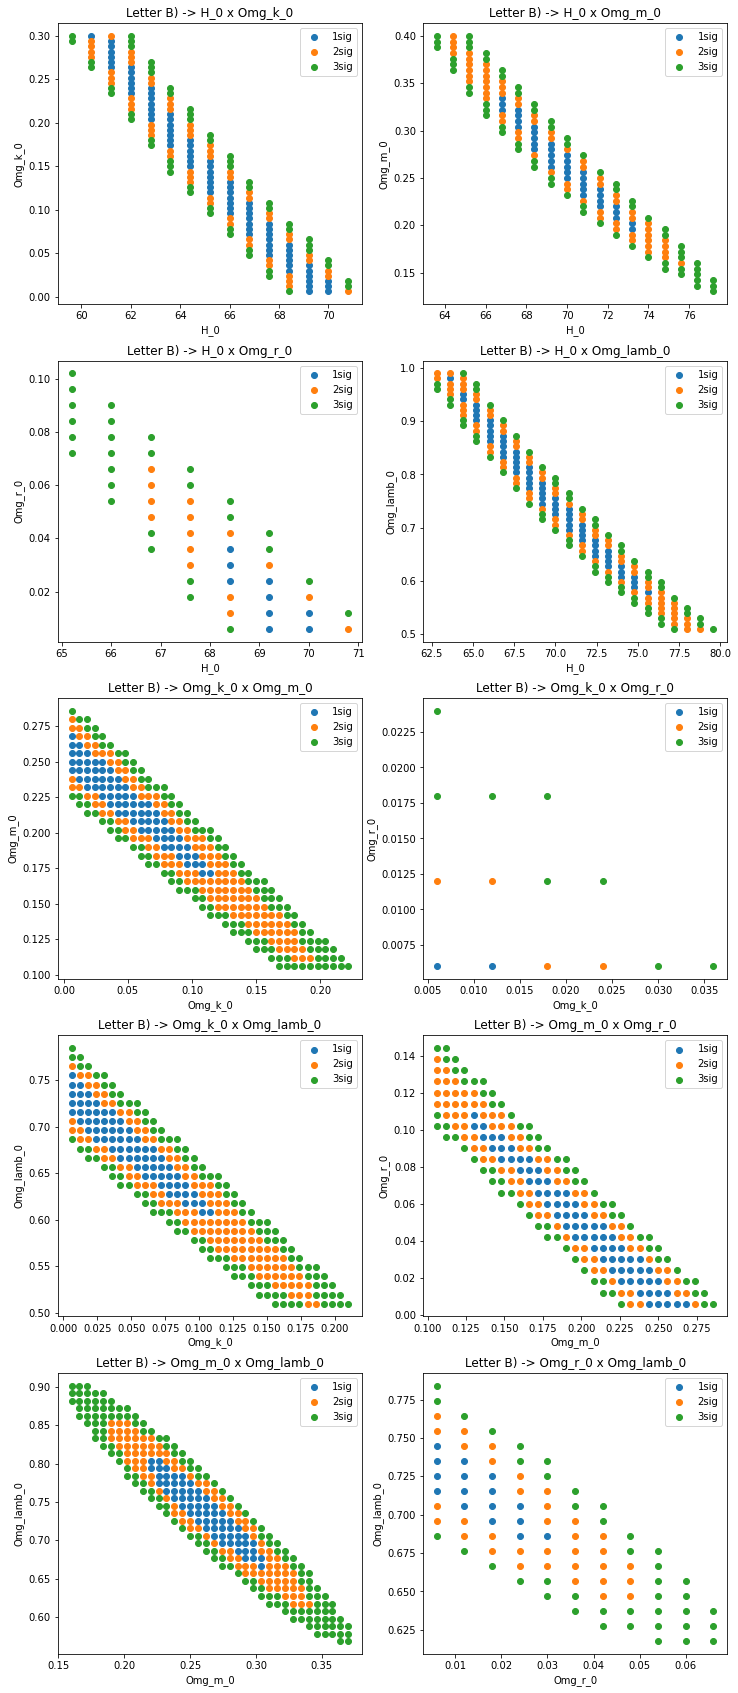

In [21]:
### Defining the figure and axis.
graph_num = 10
figure, axis = plt.subplots(int(graph_num/2), 2, figsize=(12,int(graph_num*6/2)))

########### H0 ##############
axis[0, 0].scatter(H0k0_1sig_H0, H0k0_1sig_k0, label='1sig')
axis[0, 0].scatter(H0k0_2sig_H0, H0k0_2sig_k0, label='2sig')
axis[0, 0].scatter(H0k0_3sig_H0, H0k0_3sig_k0, label='3sig')
axis[0, 0].set_title('Letter B) -> H_0 x Omg_k_0')
axis[0, 0].set_xlabel('H_0')
axis[0, 0].set_ylabel('Omg_k_0')
axis[0, 0].legend()

axis[0, 1].scatter(H0m0_1sig_H0, H0m0_1sig_m0, label='1sig')
axis[0, 1].scatter(H0m0_2sig_H0, H0m0_2sig_m0, label='2sig')
axis[0, 1].scatter(H0m0_3sig_H0, H0m0_3sig_m0, label='3sig')
axis[0, 1].set_title('Letter B) -> H_0 x Omg_m_0')
axis[0, 1].set_xlabel('H_0')
axis[0, 1].set_ylabel('Omg_m_0')
axis[0, 1].legend()

axis[1, 0].scatter(H0r0_1sig_H0, H0r0_1sig_r0, label='1sig')
axis[1, 0].scatter(H0r0_2sig_H0, H0r0_2sig_r0, label='2sig')
axis[1, 0].scatter(H0r0_3sig_H0, H0r0_3sig_r0, label='3sig')
axis[1, 0].set_title('Letter B) -> H_0 x Omg_r_0')
axis[1, 0].set_xlabel('H_0')
axis[1, 0].set_ylabel('Omg_r_0')
axis[1, 0].legend()

axis[1, 1].scatter(H0lamb0_1sig_H0, H0lamb0_1sig_lamb0, label='1sig')
axis[1, 1].scatter(H0lamb0_2sig_H0, H0lamb0_2sig_lamb0, label='2sig')
axis[1, 1].scatter(H0lamb0_3sig_H0, H0lamb0_3sig_lamb0, label='3sig')
axis[1, 1].set_title('Letter B) -> H_0 x Omg_lamb_0')
axis[1, 1].set_xlabel('H_0')
axis[1, 1].set_ylabel('Omg_lamb_0')
axis[1, 1].legend()

########### K0 ##############
axis[2, 0].scatter(k0m0_1sig_k0, k0m0_1sig_m0, label='1sig')
axis[2, 0].scatter(k0m0_2sig_k0, k0m0_2sig_m0, label='2sig')
axis[2, 0].scatter(k0m0_3sig_k0, k0m0_3sig_m0, label='3sig')
axis[2, 0].set_title('Letter B) -> Omg_k_0 x Omg_m_0')
axis[2, 0].set_xlabel('Omg_k_0')
axis[2, 0].set_ylabel('Omg_m_0')
axis[2, 0].legend()

axis[2, 1].scatter(k0r0_1sig_k0, k0r0_1sig_r0, label='1sig')
axis[2, 1].scatter(k0r0_2sig_k0, k0r0_2sig_r0, label='2sig')
axis[2, 1].scatter(k0r0_3sig_k0, k0r0_3sig_r0, label='3sig')
axis[2, 1].set_title('Letter B) -> Omg_k_0 x Omg_r_0')
axis[2, 1].set_xlabel('Omg_k_0')
axis[2, 1].set_ylabel('Omg_r_0')
axis[2, 1].legend()

axis[3, 0].scatter(k0lamb0_1sig_k0, k0lamb0_1sig_lamb0, label='1sig')
axis[3, 0].scatter(k0lamb0_2sig_k0, k0lamb0_2sig_lamb0, label='2sig')
axis[3, 0].scatter(k0lamb0_3sig_k0, k0lamb0_3sig_lamb0, label='3sig')
axis[3, 0].set_title('Letter B) -> Omg_k_0 x Omg_lamb_0')
axis[3, 0].set_xlabel('Omg_k_0')
axis[3, 0].set_ylabel('Omg_lamb_0')
axis[3, 0].legend()

########### M0 ##############
axis[3, 1].scatter(m0r0_1sig_m0, m0r0_1sig_r0, label='1sig')
axis[3, 1].scatter(m0r0_2sig_m0, m0r0_2sig_r0, label='2sig')
axis[3, 1].scatter(m0r0_3sig_m0, m0r0_3sig_r0, label='3sig')
axis[3, 1].set_title('Letter B) -> Omg_m_0 x Omg_r_0')
axis[3, 1].set_xlabel('Omg_m_0')
axis[3, 1].set_ylabel('Omg_r_0')
axis[3, 1].legend()

axis[4, 0].scatter(m0lamb0_1sig_m0, m0lamb0_1sig_lamb0, label='1sig')
axis[4, 0].scatter(m0lamb0_2sig_m0, m0lamb0_2sig_lamb0, label='2sig')
axis[4, 0].scatter(m0lamb0_3sig_m0, m0lamb0_3sig_lamb0, label='3sig')
axis[4, 0].set_title('Letter B) -> Omg_m_0 x Omg_lamb_0')
axis[4, 0].set_xlabel('Omg_m_0')
axis[4, 0].set_ylabel('Omg_lamb_0')
axis[4, 0].legend()

########### R0 ##############
axis[4, 1].scatter(r0lamb0_1sig_r0, r0lamb0_1sig_lamb0, label='1sig')
axis[4, 1].scatter(r0lamb0_2sig_r0, r0lamb0_2sig_lamb0, label='2sig')
axis[4, 1].scatter(r0lamb0_3sig_r0, r0lamb0_3sig_lamb0, label='3sig')
axis[4, 1].set_title('Letter B) -> Omg_r_0 x Omg_lamb_0')
axis[4, 1].set_xlabel('Omg_r_0')
axis[4, 1].set_ylabel('Omg_lamb_0')
axis[4, 1].legend()

plt.show()

# ITEM D)

In [22]:
mu_obs_b = means_obs
sigma_obs_b = sigma_obs
z_obs_b = z_obs

### Null hypothesis likelihood:
Omg_lamb_0_best_null = 0.7375684
Omg_m_0_best_null = 0.2624316
H_0_best_null = 70.01523352
Omg_r_0_null = 0
Omg_k_0_null = 0

mod_dist_null = modular_dist(z_obs_b, Omg_lamb_0_best_null, Omg_k_0_null, Omg_m_0_best_null, Omg_r_0_null, H_0_best_null)
      
likelihood_null = np.exp((-1/2)*sum([(mod_dist_null[i] - mu_obs_b[i])**2/sigma_obs_b[i]**2 for i in range(0, len(z_obs_b))]))
    
### All parameters free likelihood:
Omg_lamb_0_best = 7.38638653e-01
Omg_k_0_best = 1.42594132e-09
Omg_m_0_best = 2.59818659e-01
Omg_r_0_best = 1.54268613e-03
H_0_best = 7.00176995e+01

mod_dist_best = modular_dist(z_obs_b, Omg_lamb_0_best, Omg_k_0_best, Omg_m_0_best, Omg_r_0_best, H_0_best)

likelihood_best = np.exp((-1/2)*sum([(mod_dist_best[i] - mu_obs_b[i])**2/sigma_obs_b[i]**2 for i in range(0, len(z_obs_b))]))

print('The value of $\lambda$ is: \n')
print(likelihood_null/likelihood_best)

The value of $\lambda$ is: 

0.9987411638246806


So, it is very likely that the $\Omega_{k0} = \Omega_{r0} = 0$ hypothesis is true.